In [1]:
# %matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

DATA_URL = '4.5_year.csv'
df = pd.read_csv(DATA_URL)
df['date'] = pd.to_datetime(df['time'])

df = df[df.date.between('2016-01-01 00:00', '2018-12-31 23:59')]

fig, ax = plt.subplots(figsize=(25,25))

earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.75)
earth.etopo()

ax.scatter(df['longitude'], df['latitude'], [df['mag'] ** 3,df['depth'] ** 4], c='red', alpha=0.5, zorder=10)
ax.set_xlabel("This month's 4.5M+ earthquakes")
plt.show()

<Figure size 2500x2500 with 1 Axes>

In [2]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
0,2018-12-06T13:44:36.940Z,-6.5228,128.4991,338.01,4.6,mb,NaN,39.0,3.133,0.68,...,Banda Sea,earthquake,4.9,8.6,0.086,40.0,reviewed,us,us,2018-12-06 13:44:36.940
1,2018-12-06T09:43:55.570Z,12.6113,-86.9846,156.67,4.9,mww,NaN,124.0,0.105,0.90,...,Nicaragua,earthquake,7.9,6.8,0.080,15.0,reviewed,us,us,2018-12-06 09:43:55.570
2,2018-12-06T06:18:35.720Z,-21.7369,168.7078,10.00,4.8,mb,NaN,92.0,2.128,0.92,...,"Loyalty Islands, New Caledonia",earthquake,10.0,1.9,0.086,42.0,reviewed,us,us,2018-12-06 06:18:35.720
3,2018-12-06T06:07:30.250Z,-21.9700,168.9855,10.00,5.3,mww,NaN,96.0,2.360,1.24,...,"Loyalty Islands, New Caledonia",earthquake,6.2,1.8,0.075,17.0,reviewed,us,us,2018-12-06 06:07:30.250
4,2018-12-06T05:24:14.560Z,-30.7211,-71.4131,34.13,4.8,mb,NaN,50.0,0.196,0.90,...,"Coquimbo, Chile",earthquake,3.3,2.1,0.072,60.0,reviewed,us,us,2018-12-06 05:24:14.560


In [3]:
df.shape

(7304, 23)

In [4]:
df['mag'].describe()

count    7304.000000
mean        4.817084
std         0.377295
min         4.500000
25%         4.600000
50%         4.700000
75%         4.900000
max         8.200000
Name: mag, dtype: float64

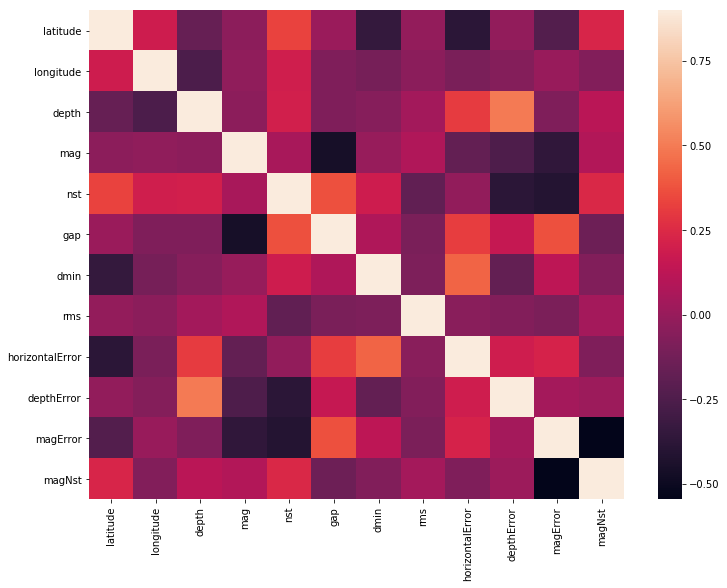

In [5]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

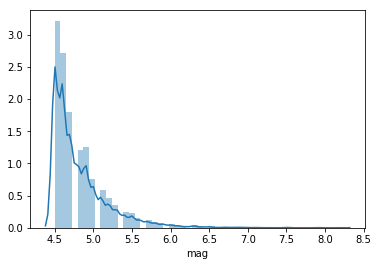

In [6]:
sns.distplot(df['mag'])

Text(0.5, 1.0, 'Profondeurs')

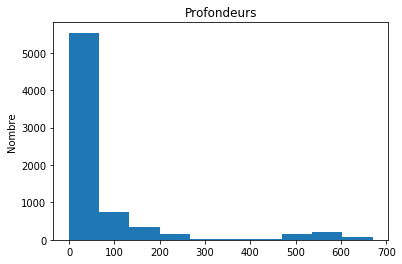

In [7]:
plt.hist(df['depth'])
plt.ylabel('Nombre')
plt.title('Profondeurs')

In [8]:
#df.date.dt.month
#df.groupby(df.date.dt.month).mean()
df.date.dt.date.value_counts().head(5)

2018-08-19    125
2018-07-10     88
2018-10-16     71
2018-09-28     65
2018-10-26     61
Name: date, dtype: int64

In [9]:
dz = pd.DataFrame(df.date.dt.date.value_counts())
dz = dz.rename(columns={'date': 'Catastrophes'})
dz['Date'] = dz.index.values
dz.sort_values(by='Date').head(5)

#plt.hist(df.date.dt.month.value_counts())
#plt.ylabel('Number of occurances')
#plt.title('EQ/Month')

,Catastrophes,Date
2017-11-29,12,2017-11-29
2017-11-30,22,2017-11-30
2017-12-01,21,2017-12-01
2017-12-02,11,2017-12-02
2017-12-03,15,2017-12-03


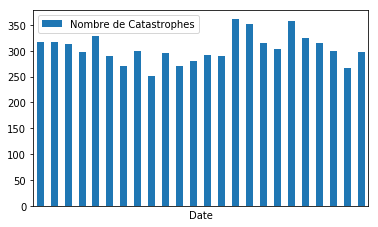

In [10]:
dy = pd.DataFrame(df.date.dt.hour.value_counts())
dy = dy.rename(columns={'date': 'Nombre de Catastrophes'})
dy['Date'] = dy.index.values
ax=dy.groupby('Date').mean().plot(kind='bar',rot=45)

ax.xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()

plt.show()

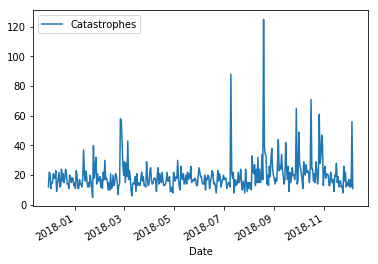

In [11]:
ax = dz.groupby('Date').mean().plot(kind='line')
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.show()

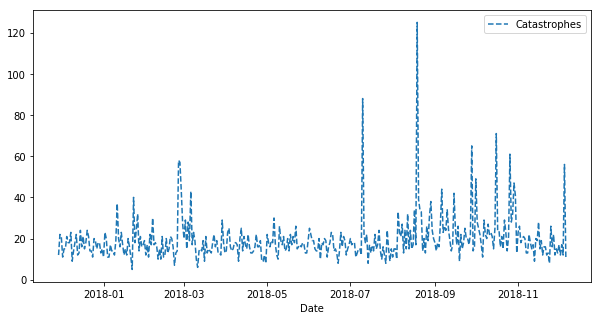

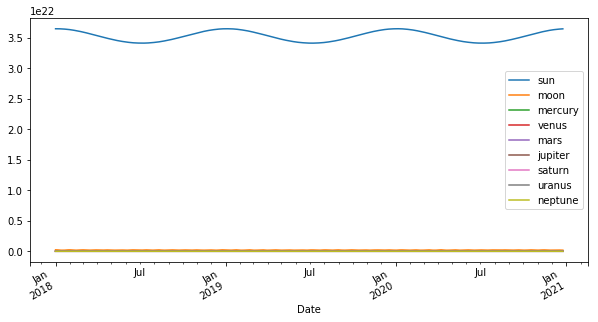

In [20]:
#fig, az = plt.subplots(figsize=(20,5))
#ax2 = az.twinx()

#DATA Planet Distance
DATA_URL2 = 'planet_grt_20.csv'
dx = pd.read_csv(DATA_URL2)
dx['Date'] = pd.to_datetime(dx['date'])
dx = dx[dx.date.between('2018-01-01', '2021-12-31')]

#DATA Date
dz.groupby('Date').mean().plot(figsize=(10,5),kind='line',ls='--')
dx.groupby('Date').mean().plot(figsize=(10,5))

plt.gcf().autofmt_xdate()
plt.show()

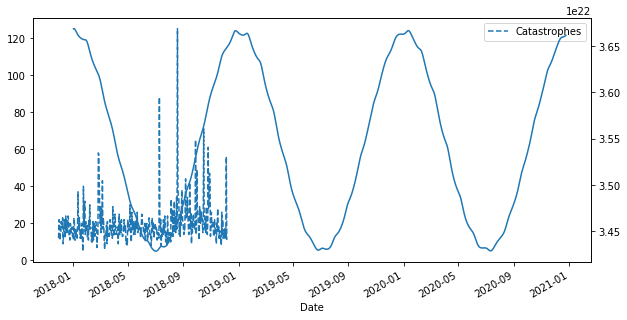

In [21]:
fig, plot1 = plt.subplots(figsize=(20,5))
plot2 = plot1.twinx()

##
ret = {}
for index, row in dx.iterrows():
    ret[index]=({'date': row['date'],
                 'combined': row['sun']+row['moon']+row['mercury']+row['venus']+row['mars']+row['jupiter']+row['saturn']+row['uranus']+row['neptune'],
                 'moon':row['moon'],
                 'sun':row['sun']
                })
data = pd.DataFrame.from_dict(ret, orient='index')
data['Date'] = pd.to_datetime(data['date'])

dz.groupby('Date').mean().plot(ax=plot1,figsize=(10,5),kind='line',ls='--')

#az = data.set_index('Date').plot(ax=plot2,rot=45,figsize=(10,5))
plot2.plot(data['Date'],data[['combined']])

#az.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()
plt.show()
